# Let's Do a Project

- First Let's import all the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

- You'll see a dataset called `advertising.csv` in this folder. Load the data using Pandas.

In [2]:
data = pd.read_csv('advertising.csv')

- Check the head of ad_data.

In [3]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


- See the information about the data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


As this is a project on `logistic regression`, we need to select a categorical column for the target variable. Let's select `Clicked on Ad` as the target variable.

## Data Analysis

Let's Explore The Data!

- Create a histogram of the Age column and write down the observations.

<Axes: xlabel='Age', ylabel='Count'>

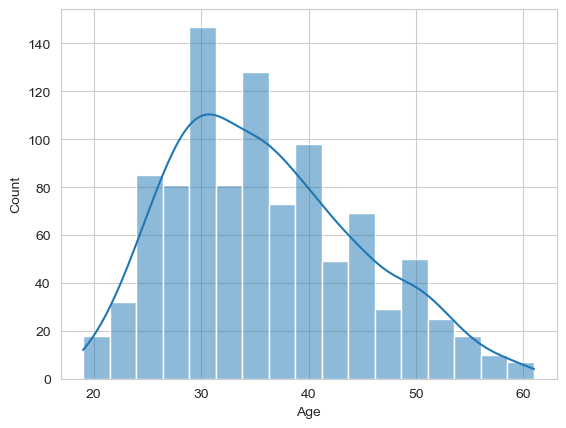

In [7]:
sns.set_style('whitegrid')
sns.histplot(data=data,x='Age', kde=True)

Your Observations:

- Create a jointplot showing Area Income versus Age.

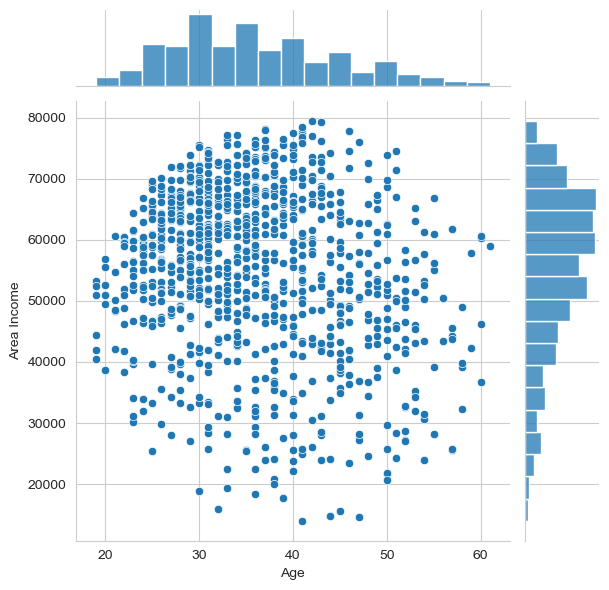

In [8]:
sns.jointplot(x='Age',y='Area Income',data=data)

- Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage' with a kind of 'kde' and see if there are any distinctions in the data.

> You can pass the `fill=True` parameter to fill the area under the curve of the density plot.

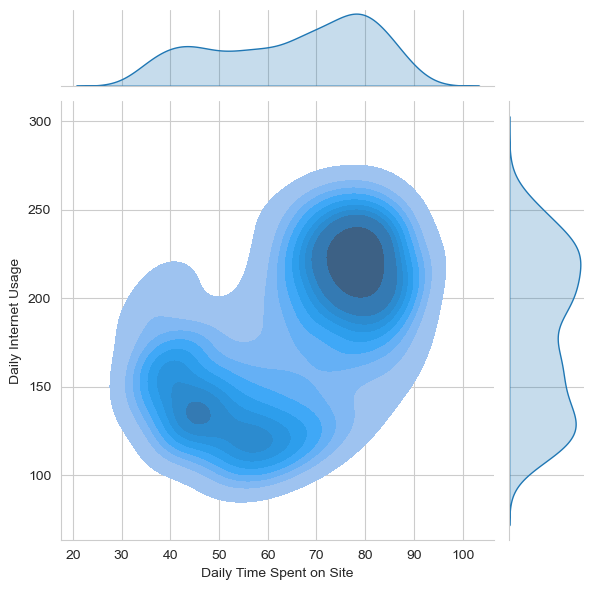

In [13]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=data, kind='kde',fill = True)

I think the data is well defined. So,

- Make a pairplot of the data and set the hue to 'Clicked on Ad' to see the relationship between the features and the target variable.

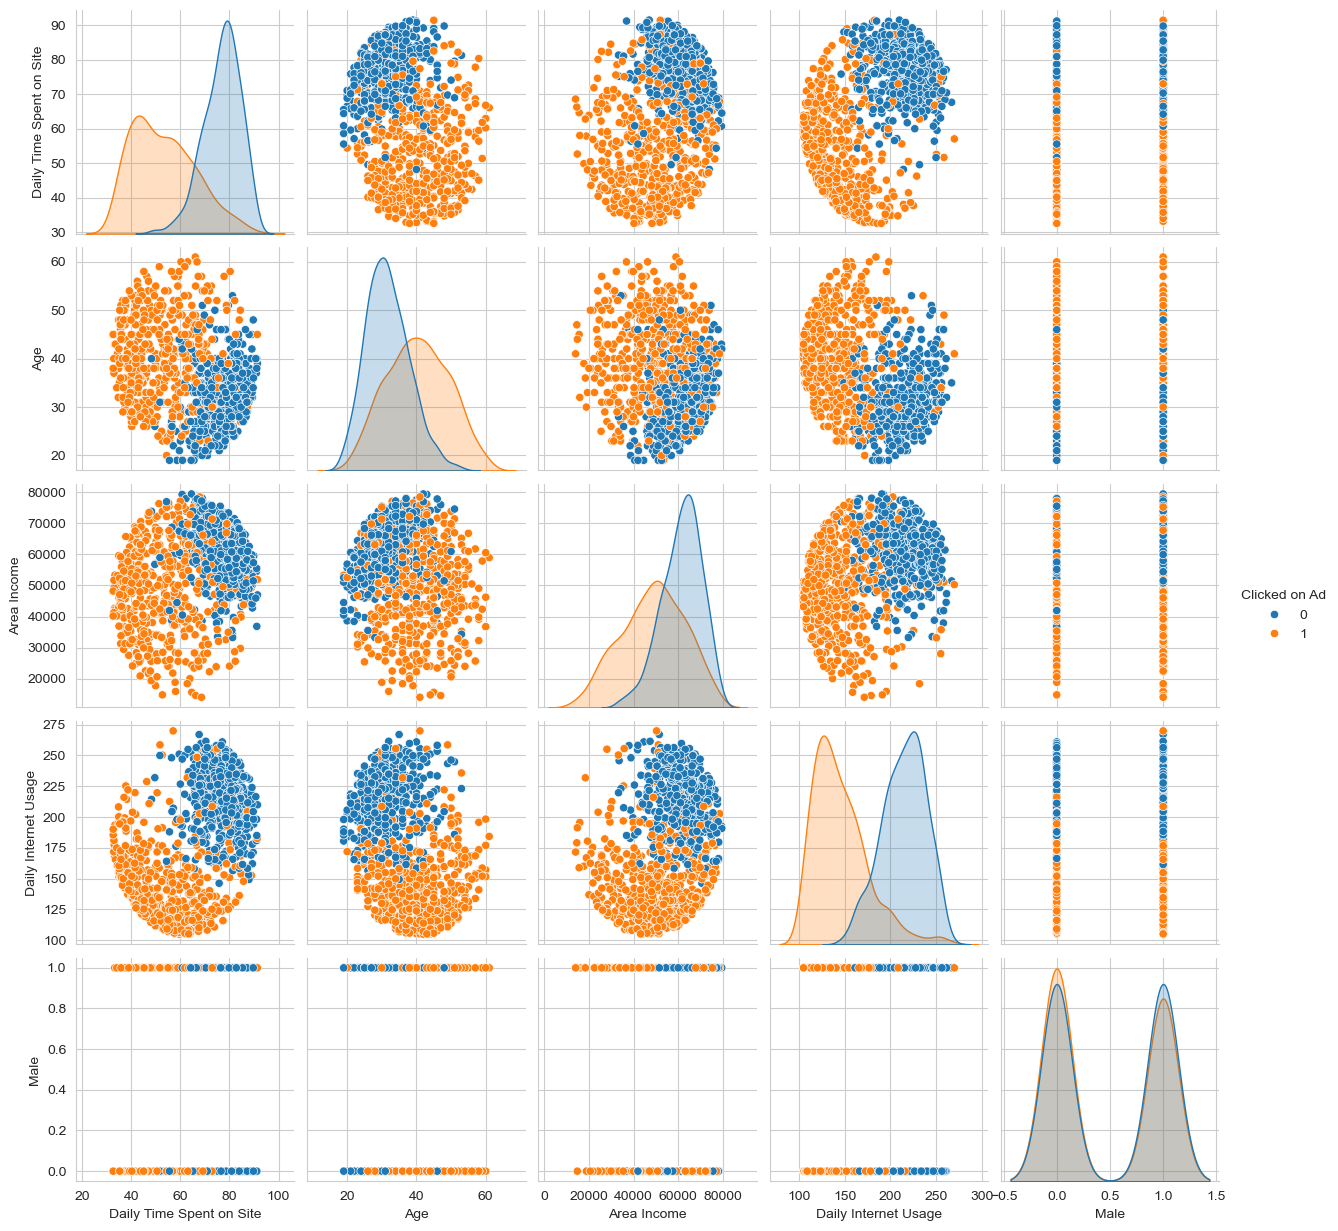

In [15]:
sns.pairplot(data,hue='Clicked on Ad')

Yes, There is a clear relationship between the features and the target variable.

# Logistic Regression

So, time to implement Logistic Regression.

- Split the data. The train data should have 70% of the data.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = data['Clicked on Ad']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

- Train the model.

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()
model.fit(X_train,y_train)

/home/itvaya/miniconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


- Make Predictions and evaluate the model.

In [28]:
predictions = model.predict(X_test)

- Create a classification report for the model.

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       171
           1       0.99      0.97      0.98       159

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330



## Great Job!

We have an amazing model with overall performance of 98%.

- Write your thoughts on how did the model perform well in this project?